In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron

from numpy import std
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from skopt import BayesSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, kurtosis

df = pd.read_csv('Deidentified_data(approved)_.csv')
#numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns


In [16]:
df['age']=df['age'].replace('89+', 91)
df.age = df.age.astype(int) 

cleanup_nums = {"race":     {"Other_Pacific_Islander": 1, "Native_American_Alaskan": 2, "Asian":3 , 
                             "Declined":4, "White":5,  "Black":6, "Other":7},                         
                "gender": {"F": 1, "M": 0}}

df=df.replace(cleanup_nums)
df=df.dropna(how='any',axis=0,thresh=df.shape[1]*0.7) 
df=df.dropna(how='any',axis=1,thresh=df.shape[0]*0.8)  

y=df['death']
X=df.drop(columns='death')

In [17]:
cols=["age","diastolicBP","systolicBP","cr","NLratio","pulseOx","temperature","bun","troponin","ptt","bmi","creatine_kinase" , "potassium"]
X[cols].describe()

,age,diastolicBP,systolicBP,cr,NLratio,pulseOx,temperature,bun,troponin,ptt,bmi,creatine_kinase,potassium
count,4060.000000,4060.000000,4060.000000,4014.000000,4060.000000,4059.000000,4058.000000,4014.000000,3549.000000,3252.000000,3834.000000,3299.000000,3984.000000
mean,64.386700,67.506897,120.091379,2.041148,7.967639,92.503326,99.217250,32.930487,0.058729,35.419404,30.448542,621.985748,4.427962
std,16.317759,16.718654,24.840636,2.585485,8.892819,8.478813,1.694207,32.782917,0.264979,14.719528,49.796762,2804.497742,0.741325
min,18.000000,0.000000,0.000000,0.199990,0.000000,11.000000,85.300000,4.999000,0.009990,19.000000,9.900000,19.999000,1.999900
25%,55.000000,59.000000,107.000000,0.810000,3.461538,90.000000,98.200000,13.000000,0.010000,29.600000,24.622500,86.000000,4.000000
50%,66.000000,69.000000,122.000000,1.130000,5.777778,95.000000,98.900000,20.500000,0.010000,32.800000,28.420000,168.000000,4.400000
75%,77.000000,79.000000,136.000000,1.960000,9.603846,98.000000,100.000000,40.000000,0.030000,37.000000,33.190000,416.000000,4.800000
max,91.000000,120.000000,215.000000,31.660000,208.500000,100.000000,122.000000,301.000000,9.560000,200.000100,3069.260000,80000.001000,9.000100


In [105]:
for col in df[cols]:
    print("Skew: %s %.3f" % (col,skew(df[col])))

Skew: age -0.530
Skew: diastolicBP -0.702
Skew: systolicBP -0.869
Skew: cr nan
Skew: NLratio 7.486
Skew: pulseOx nan
Skew: temperature nan
Skew: bun nan
Skew: troponin nan
Skew: ptt nan
Skew: bmi nan
Skew: creatine_kinase nan
Skew: potassium nan


In [106]:
for col in  df[cols]:
    print("kurtosis: %s %.3f" % (col,kurtosis(df[col])))

kurtosis: age -0.220
kurtosis: diastolicBP 1.148
kurtosis: systolicBP 2.385
kurtosis: cr nan
kurtosis: NLratio 107.884
kurtosis: pulseOx nan
kurtosis: temperature nan
kurtosis: bun nan
kurtosis: troponin nan
kurtosis: ptt nan
kurtosis: bmi nan
kurtosis: creatine_kinase nan
kurtosis: potassium nan


In [6]:
cols=['age',  'ventilator', 'diastolicBP', 'systolicBP', 'cr',
       'NLratio', 'pulseOx', 'temperature', 'bun', 'troponin', 'ptt', 'bmi',
       'creatine_kinase', 'potassium']

myheart = df['death']
myage = df['age']
heart_0 = myheart == 0
heart_1 = myheart == 1

<AxesSubplot:xlabel='death', ylabel='count'>

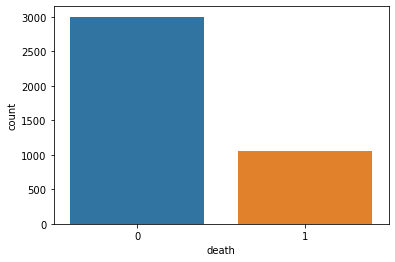

In [91]:
sns.countplot(x='death',data=df)

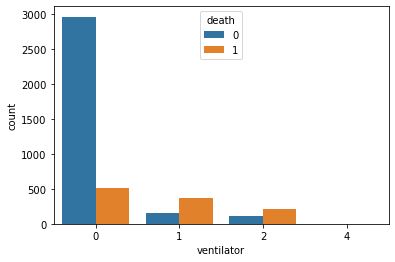

In [95]:
a=sns.countplot(x='ventilator',hue='death',data=df)

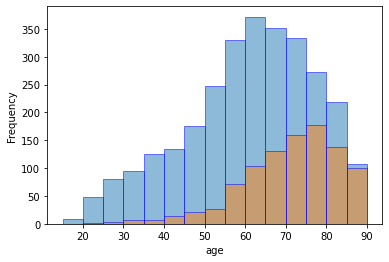

In [56]:
plt.hist(myage[heart_0], edgecolor='blue', alpha=0.5, bins =range(15,95,5), label='0')
plt.hist(myage[heart_1], edgecolor='blue', alpha=0.5, bins = range(15,95,5) , label='1')


plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

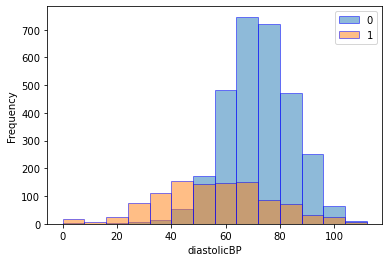

In [57]:
myheart = df['death']
mydiastolicBP = df['diastolicBP']

plt.hist(mydiastolicBP[heart_0], edgecolor='blue', alpha=0.5, bins = range(0,120,8), label='0')
plt.hist(mydiastolicBP[heart_1], edgecolor='blue', alpha=0.5, bins = range(0,120,8), label='1')
plt.legend(loc='upper right')
plt.xlabel('diastolicBP')
plt.ylabel('Frequency')
plt.show()

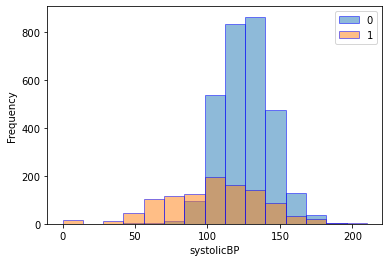

In [58]:
myheart = df['death']
mysystolicBP = df['systolicBP']

plt.hist(mysystolicBP[heart_0], edgecolor='blue', alpha=0.5, bins = range(0,215,14), label='0')
plt.hist(mysystolicBP[heart_1], edgecolor='blue', alpha=0.5, bins = range(0,215,14), label='1')
plt.legend(loc='upper right')
plt.xlabel('systolicBP')
plt.ylabel('Frequency')
plt.show()

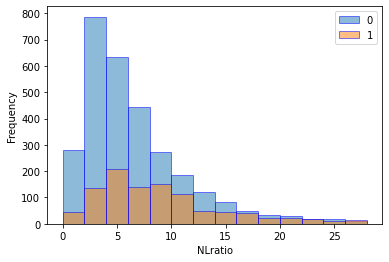

In [66]:
myheart = df['death']
myNLratio = df['NLratio']

plt.hist(myNLratio[heart_0], edgecolor='blue', alpha=0.5, bins = range(0,30,2), label='0')
plt.hist(myNLratio[heart_1], edgecolor='blue', alpha=0.5, bins =  range(0,30,2), label='1')
plt.legend(loc='upper right')
plt.xlabel('NLratio')
plt.ylabel('Frequency')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state=42)

In [19]:
numerical_ix= ['ventilator', 'albumin', 'diastolicBP', 'systolicBP',
       'cr', 'egfr', 'eosinophil', 'hgb', 'inr', 'lymphocyte', 'neutrophil',
       'NLratio', 'platelet', 'protein', 'pulse', 'pulseOx', 'rr',
       'temperature', 'wbc', 'alt', 'ast', 'bun', 'calcium', 'chloride', 'crp',
       'interleukin6', 'mcv', 'monocyte', 'mpv', 'rdw', 'troponin', 'ptt',
       'bmi', 'glucose', 'direct_bili', 'total_bili', 'indirect_bili',
       'creatine_kinase', 'potassium', 'charlson_score']

categorical_features=['race']

In [5]:
numeric_transformer = Pipeline ( steps = [("imputer", SimpleImputer(strategy="median")),('scale',StandardScaler())])
preprocessor_1 = ColumnTransformer(transformers =[('numeric_transformer',numeric_transformer, numerical_ix),
    ('encode', OneHotEncoder(),categorical_features)],remainder='passthrough')

preprocessor_2 = ColumnTransformer(transformers =[("imputer", SimpleImputer(strategy="median"), numerical_ix)],remainder='passthrough')
under = RandomUnderSampler(sampling_strategy=0.5,random_state=40)
def get_models():
    models = dict()
                                    
    model = RandomForestClassifier()
    models['Random forest'] = Pipeline(steps=[('preprocessor_2',preprocessor_2),('under', under),('m',model)])

    model = LogisticRegression()
    models['DecisionTree'] = Pipeline(steps=[('preprocessor_1',preprocessor_1),('under', under),('m',model)])

    model= xgb.XGBClassifier()
    models['xgboost'] = Pipeline(steps=[('preprocessor_2',preprocessor_2),('under', under),('m',model)])

    model = SVC()
    models['svm'] = Pipeline(steps=[('preprocessor_1',preprocessor_1),('under', under),('m',model)])
    
    model = AdaBoostClassifier(random_state=42)
    models['Adaboost'] = Pipeline(steps=[('preprocessor_2',preprocessor_1),('under', under),('m',model)])

    lr= LogisticRegression()
    gnb=GaussianNB()
    kn=KNeighborsClassifier(n_neighbors=1)
    base_methods=[('pipe_lr', lr),('pipe_gnb', gnb),('pipe_Kn',kn)]
    vote_model=VotingClassifier(estimators=base_methods,voting='hard')
   
    models['Voting'] = Pipeline(steps=[('preprocessor_2',preprocessor_1),('under', under),('m',vote_model)])

    return models
 
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5,shuffle=True)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores
 
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Random forest 0.722 (0.029)
>DecisionTree 0.701 (0.023)
>xgboost 0.726 (0.034)
>svm 0.638 (0.025)
>Adaboost 0.712 (0.038)
>Voting 0.623 (0.053)


In [12]:
def get_models():
    models = dict()
    for i in range(5,30):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = xgb.XGBClassifier()
        models[str(i)] = Pipeline(steps=[("preprocessor_2", preprocessor_2),('s',rfe),('under', under),('m',model)])
    return models

def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>5 0.662 (0.051)
>6 0.668 (0.018)
>7 0.683 (0.006)
>8 0.690 (0.027)
>9 0.699 (0.042)
>10 0.693 (0.039)
>11 0.704 (0.028)
>12 0.702 (0.046)
>13 0.723 (0.021)
>14 0.720 (0.021)
>15 0.699 (0.043)
>16 0.722 (0.029)
>17 0.712 (0.030)
>18 0.696 (0.030)
>19 0.706 (0.029)
>20 0.717 (0.047)
>21 0.712 (0.037)
>22 0.714 (0.051)
>23 0.707 (0.043)
>24 0.702 (0.024)
>25 0.719 (0.036)
>26 0.713 (0.050)
>27 0.710 (0.045)
>28 0.709 (0.045)
>29 0.710 (0.045)


In [15]:
model = xgb.XGBClassifier()

def get_models():
    models = dict()
    rfe = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=13)
    models['lr'] = Pipeline(steps=[('preprocessor_1',preprocessor_1),('rfe',rfe),('under', under),('m',model)])
  
    rfe = RFE(estimator=Perceptron(), n_features_to_select=13)   
    models['per'] = Pipeline(steps=[('preprocessor_1',preprocessor_1),('rfe',rfe),('under', under),('m',model)])
    
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=13)
    models['dtc'] = Pipeline(steps=[('preprocessor_2',preprocessor_2),('rfe',rfe),('under', under),('m',model)])
    
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=13)
    models['rf'] = Pipeline(steps=[('preprocessor_2',preprocessor_2),('rfe',rfe),('under', under),('m',model)])
    return models
 
def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=5,shuffle=True)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores
 
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.668 (0.024)
>per 0.661 (0.029)
>dtc 0.711 (0.023)
>rf 0.712 (0.029)


In [7]:
n_estimators=[150,200,250,300,450]
max_features = ['auto', 'sqrt']
max_depth=[8,9,10,11,12]
min_samples_split = [2,5, 10]
min_samples_leaf = [1, 2,3, 4]
bootstrap = [True, False]
random_grid = {'rfe__estimator__max_depth':[2,4,6,8,10,12,None],'rfe__n_features_to_select':[10,11,12,13,14,15],
    'under__sampling_strategy':[0.5,0.8],'model__n_estimators': n_estimators, 'model__max_features': max_features, 
 'model__max_depth': max_depth, 'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf, 'model__bootstrap': bootstrap}

rfe = RFE(estimator=DecisionTreeClassifier())
under = RandomUnderSampler(random_state=40)
preprocessor_2=ColumnTransformer(transformers=[("imputer",SimpleImputer(strategy="median"),numerical_ix)],remainder='passthrough')

model = RandomForestClassifier(random_state=42)

model_pipeline = Pipeline(steps =[("preprocessor_2", preprocessor_2),('rfe',rfe),
                                  ('under', under),('model', model)])

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

opt = BayesSearchCV( model_pipeline,[(random_grid, 60)],cv=cv,scoring='f1')
opt.fit(X_train, y_train)

print(opt.best_params_)
print(opt.best_score_)

OrderedDict([('model__bootstrap', True), ('model__max_depth', 12), ('model__max_features', 'auto'), ('model__min_samples_leaf', 1), ('model__min_samples_split', 2), ('model__n_estimators', 150), ('under__sampling_strategy', 0.728126631947327)])
0.7395731155916903


In [8]:
model= xgb.XGBClassifier(use_label_encoder=False,n_jobs = 1,objective = 'binary:logistic',eval_metric = 'auc',silent=1, tree_method='approx')

under = RandomUnderSampler(random_state=40)
rfe = RFE(estimator=DecisionTreeClassifier())

preprocessor_2=ColumnTransformer(transformers=[("imputer",SimpleImputer(strategy="median"),numerical_ix)],remainder='passthrough')

random_grid = {'rfe__estimator__max_depth':[2,4,6,8,10,12,None],'rfe__n_features_to_select':[10,11,12,13,14,15],
'under__sampling_strategy':[0.5,0.8],"model__learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
"model__max_depth":[3,4,5,6,8,10,12,15], "model__min_child_weight":[1,3,5,7],"model__gamma":[0.0,0.1,0.2,0.3,0.4],
"model__colsample_bytree":[0.3,0.4,0.5,0.7],'model__subsample': (0.01, 1.0, 'uniform'), 
'model__colsample_bytree': [0.3,0.4,0.5,0.7],'model__colsample_bylevel': (0.01, 1.0, 'uniform'), 'model__n_estimators': (50, 100,200,300)}

#model_pipeline = Pipeline(steps =[("preprocessor_2", preprocessor_2), ('rfe',rfe),('under', under),('model',model)])

cv = StratifiedKFold(n_splits=5,shuffle=True)

opt = BayesSearchCV( model_pipeline,[(random_grid, 100)],cv=cv,scoring='f1',n_jobs = 3,verbose = 0,refit = True,random_state = 42)

opt.fit(X_train, y_train)

print(opt.best_params_)
print(opt.best_score_)

[03:23:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


OrderedDict([('model__colsample_bylevel', 1.0), ('model__colsample_bytree', 0.7), ('model__gamma', 0.0), ('model__learning_rate', 0.05), ('model__max_depth', 6), ('model__min_child_weight', 1), ('model__n_estimators', 300), ('model__subsample', 1.0), ('under__sampling_strategy', 0.5)])
0.7405073108770674


In [22]:
rfe = RFE(estimator=DecisionTreeClassifier(max_depth=8),n_features_to_select=15)#xgb
#rfe = RFE(estimator=DecisionTreeClassifier(max_depth=6),n_features_to_select=15)#rf

preprocessor_2=ColumnTransformer(transformers=[("imputer",SimpleImputer(strategy="median"),numerical_ix)],remainder='passthrough')


#under = RandomUnderSampler(sampling_strategy=0.5839989677305552,random_state=40)#rf 
under = RandomUnderSampler(sampling_strategy=0.8,random_state=40)#xgb

#model = RandomForestClassifier(bootstrap=True, max_depth=10,max_features='sqrt',n_estimators=450,min_samples_leaf=3,
    #                           min_samples_split=2,random_state=42) 


model= xgb.XGBClassifier(use_label_encoder=False,n_jobs = 1,objective = 'binary:logistic',eval_metric = 'auc',
colsample_bylevel=0.01,colsample_bytree=0.7,gamma=0.4,learning_rate=0.05,max_depth=3,min_child_weight=1,
        n_estimators=100,subsample=0.7173804504207143, silent=1, tree_method='approx') 
    
pipeline_model = Pipeline(steps=[ ("preprocessor_2", preprocessor_2),('rfe',rfe),('under',under),('model',model)])

pipeline_model.fit(X_train, y_train)

y_pred_train=pipeline_model.predict(X_train)

conf_pred_train=confusion_matrix(y_train,y_pred_train)
print(conf_pred_train)

score_train=f1_score(y_train,y_pred_train)
print(" F1 on training set {}".format(score_train))
y_pred_test = pipeline_model.predict(X_test)

conf_pred_test = confusion_matrix(y_test, y_pred_test) 
print(conf_pred_test)
score=f1_score(y_test,y_pred_test)
print(" F1 on test set {}".format(score))
print(classification_report(y_test, y_pred_test))

[02:02:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[[2153  249]
 [ 163  683]]
 F1 on training set 0.7682789651293589
[[526  75]
 [ 47 164]]
 F1 on test set 0.7288888888888889
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       601
           1       0.69      0.78      0.73       211

    accuracy                           0.85       812
   macro avg       0.80      0.83      0.81       812
weighted avg       0.86      0.85      0.85       812



In [23]:
recall_sensitivity = recall_score(y_test, y_pred_test, pos_label=1)

recall_specificity = recall_score(y_test, y_pred_test, pos_label=0)

recall_sensitivity, recall_specificity 

(0.7772511848341233, 0.8752079866888519)

In [5]:
preprocessor_2 = ColumnTransformer(transformers =[("imputer", SimpleImputer(strategy="median"), numerical_ix)],remainder='passthrough')
under_xgb = RandomUnderSampler(sampling_strategy=0.8,random_state=40)
under_rf = RandomUnderSampler(sampling_strategy=0.5839989677305552,random_state=40)

rfe_xgb = RFE(estimator=DecisionTreeClassifier(max_depth=8),n_features_to_select=15)#xgb
rfe_rf = RFE(estimator=DecisionTreeClassifier(max_depth=6),n_features_to_select=15)#rf

model_xgb= xgb.XGBClassifier(use_label_encoder=False,n_jobs = 1,objective = 'binary:logistic',eval_metric = 'auc',
colsample_bylevel=0.01,colsample_bytree=0.7,gamma=0.4,learning_rate=0.05,max_depth=3,min_child_weight=1,
        n_estimators=100,subsample=0.7173804504207143, silent=1, tree_method='approx') 


model_rf = RandomForestClassifier(bootstrap=True, max_depth=10,max_features='sqrt',n_estimators=450,min_samples_leaf=3,
                               min_samples_split=2,random_state=42) 
                               
pipeline_model_xgb = Pipeline(steps=[ ("preprocessor_2", preprocessor_2),('rfe_xgb',rfe_xgb),('under_xgb',under_xgb),('model_xgb',model_xgb)])
pipeline_model_rf = Pipeline(steps=[ ("preprocessor_2", preprocessor_2),('rfe_rf',rfe_rf),('under_rf',under_rf),('model_rf',model_rf)])



[19:30:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['ventilator', 'albumin',
                                                   'diastolicBP', 'systolicBP',
                                                   'cr', 'egfr', 'eosinophil',
                                                   'hgb', 'inr', 'lymphocyte',
                                                   'neutrophil', 'NLratio',
                                                   'platelet', 'protein',
                                                   'pulse', 'pulseOx', 'rr',
                                                   'temperature', 'wbc', 'alt',
                                                   'ast', 'bun', 'calcium',
                                                   'chloride', 

In [6]:

model_rf = pipeline_model_xgb.fit(X_train, y_train)

probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = pipeline_model_rf.fit(X_train, y_train)

probs_xg = model_xg.predict_proba(X_test)[:, 1]

[19:30:11] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




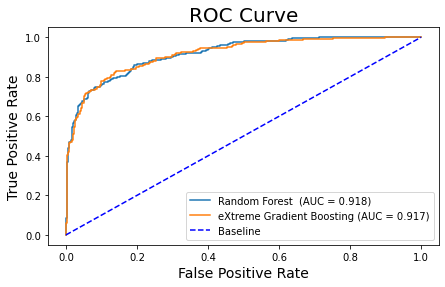

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

auc_xg = roc_auc_score(y_test, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, probs_xg)

plt.figure(figsize=(7, 4))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest  (AUC = {auc_rf:.3f})')
plt.plot(fpr_xg, tpr_xg, label=f'eXtreme Gradient Boosting (AUC = {auc_xg:.3f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [6]:
imputer = SimpleImputer(strategy="median")
X=imputer.fit_transform(X_train)
X_train = pd.DataFrame(X, columns=X_train.columns)

#rfe = RFE(estimator=DecisionTreeClassifier(max_depth=8),n_features_to_select=15)#xgb
rfe = RFE(estimator=DecisionTreeClassifier(max_depth=6),n_features_to_select=15)#rf

fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

print(X_train.columns[rfe.support_])

Num Features: 15
Selected Features: [ True False  True  True False  True  True  True False False False False
 False False  True False False False  True False  True False False False
  True False False False False False False False False  True  True  True
 False False False False  True  True False]
Feature Ranking: [ 1 15  1  1  2  1  1  1 16 17  6 14 24 22  1 28  5  8  1  9  1  4 26 20
  1  3 11 19 21 23 25 27  7  1  1  1 18 12 10 13  1  1 29]
Index(['age', 'race', 'ventilator', 'diastolicBP', 'systolicBP', 'cr',
       'NLratio', 'pulseOx', 'temperature', 'bun', 'troponin', 'ptt', 'bmi',
       'creatine_kinase', 'potassium'],
      dtype='object')
